In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb

In [2]:
(X_train_all, y_train_all), (X_test,y_test) = imdb.load_data(skip_top=20, num_words=100)
#a, the 와 같은 관사가 들어올 가능성이 있어서 top 20을 skip 한다.

17464789/17464789 [==============================] - 2s 0us/step


In [3]:
print(X_train_all.shape, y_train_all.shape)

(25000,) (25000,)


# Sample 길이를 맞추고 Ont-Hot 인코딩하기

In [5]:
print(X_train_all[0])

[2, 2, 22, 2, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 2, 2, 36, 2, 2, 25, 2, 43, 2, 2, 50, 2, 2, 2, 35, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 39, 2, 2, 2, 2, 2, 2, 38, 2, 2, 2, 2, 50, 2, 2, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 22, 71, 87, 2, 2, 43, 2, 38, 76, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 2, 2, 2, 2, 62, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 66, 2, 33, 2, 2, 2, 2, 38, 2, 2, 25, 2, 51, 36, 2, 48, 25, 2, 33, 2, 22, 2, 2, 28, 77, 52, 2, 2, 2, 2, 82, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 2, 2, 2, 2, 2, 2, 88, 2, 2, 2, 2, 98, 32, 2, 56, 26, 2, 2, 2, 2, 2, 2, 2, 22, 21, 2, 2, 26, 2, 2, 2, 30, 2, 2, 51, 36, 28, 2, 92, 25, 2, 2, 2, 65, 2, 38, 2, 88, 2, 2, 2, 2, 2, 2, 2, 2, 32, 2, 2, 2, 2, 2, 32]


> - 해당 값들은 영단어가 아니라 영단어를 고유한 정수에 일대일 대응한 것으로, BoW(Bag of Word) 또는 Word Dictionary라고 부른다. 훈련세트에서 눈에 띄는 숫자인 2는 어휘 사전에 없는 단어를 의미하고. 가장 많이 등장하는 영단어 20개를 건너뛰고 100개의 단어만 선택했기 때문에 사전에 없는 영단어가 많다.

In [6]:
for i in range(len(X_train_all)):
    X_train_all[i] = [w for w in X_train_all[i] if w>2]
print(X_train_all[0])

[22, 43, 65, 66, 36, 25, 43, 50, 35, 39, 38, 50, 22, 22, 71, 87, 43, 38, 76, 22, 62, 66, 33, 38, 25, 51, 36, 48, 25, 33, 22, 28, 77, 52, 82, 36, 71, 43, 26, 46, 88, 98, 32, 56, 26, 22, 21, 26, 30, 51, 36, 28, 92, 25, 65, 38, 88, 32, 32]


# Word Dictionary

In [7]:
word_to_index = imdb.get_word_index()
word_to_index['movie']

1641221/1641221 [==============================] - 0s 0us/step


17

## num to word

In [9]:
index_to_word = {word_to_index[k] : k for k in word_to_index}

for w in X_train_all[0]:
    print(index_to_word[w-3], end=' ')

film just story really they you just there an from so there film film were great just so much film would really at so you what they if you at film have been good also they were just are out because them all up are film but are be what they have don't you story so because all all 

In [11]:
print(len(X_train_all[0]), len(X_train_all[1]))

59 32


In [12]:
np.random.seed(42)
random_index = np.random.permutation(25000)

X_train = X_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]

X_val = X_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

## Sample Length

In [13]:
from tensorflow.keras.preprocessing import sequence

maxlen = 100

X_train_seq = sequence.pad_sequences(X_train, maxlen = maxlen)
X_val_seq = sequence.pad_sequences(X_val, maxlen= maxlen)

- Tensorflow에서 샘플의 길이를 맞춰주게 된다. 최대 Length(Max Len)을 100으로 설정하고. 나머지는 0으로 추가하게 된다.
- 중요한 것은 샘플 왼쪽에 0을 추가하는 것인데 그 이유는 오른쪽에 추가할 경우 순환 신경망에 영향을 주게 되어 모델의 성능이 

In [15]:
print(X_train_seq.shape, X_val_seq.shape)

(20000, 100) (5000, 100)


In [16]:
print(X_train_seq[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 35 40 27 28 40 22 83 31 85 45
 24 23 31 70 31 76 30 98 32 22 28 51 75 56 30 33 97 53 38 46 53 74 31 35
 23 34 22 58]


- 왼쪽으로 0이 추가된 것을 확인할 수 있다.

# One Hot Encode

In [17]:
from tensorflow.keras.utils import to_categorical

X_train_onehot = to_categorical(X_train_seq)
X_val_onehot = to_categorical(X_val_seq)

In [18]:
print(X_train_onehot.shape)

(20000, 100, 100)


- One Hot Encoding을 통해 OneHot이 새로운 차원으로 값이 추가되었다.

# 순환신경망 클래스 구현

- init 메서드 은닉층의 개수 대신 셀 개수를 입력받는다.
- 셀에 필요한 가중치 w1h, w1x를 선언
- 타임스텝을 역전파로 Gradient를 전파하려면 순환층의 활성화 출력을 모두 가지고 있어야한다. -> h선언

In [20]:
def __init__(self, n_cells=10, batch_size=32, learning_rate=0.1):
    self.n_cells = n_cells
    self.batch_size = batch_size
    self.w1h = None
    self.w1x = None
    self.b1 = None
    self.w2 = None
    self.b2 = None
    self.h = None
    self.losses=[]
    self.val_losses = []
    self.lr = learning_rate
    
def init_weights(self, n_features, n_classes):
    orth_init = tf.initializers.Orthogonal()
    glorot_init = tf.initializers.GlorotUniform()
    
    self.w1h = orth_init((self.n_cells, self.n_cells)).numpy()
    self.w1x = glorot_init((n_faetures, self.n_cells)).numpy()
    self.b1 = np.zeros(self.n_cells)
    self.w2 = glorot_init((self.n_cells, n_classes)).numpy()
    self.b2 = np.zeros(n_classes)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

- Time step의 길이가 100이고
- One Hot 크기가 100임.
입력크기(100,100)이기때문임.

In [22]:
model = Sequential()

model.add(SimpleRNN(32, input_shape=(100,100)))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                4256      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


- W1x의 행렬요소는 100x32
- W1h의 행렬 요소는 32x32
- 셀마다 총 32개의 절편
> - 따라서 4256개의 파라미터

In [23]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history= model.fit(X_train_onehot, y_train, epochs=20, batch_size=32, validation_data=(X_val_onehot,y_val))

Epoch 1/20
625/625 [==============================] - 14s 20ms/step - loss: 0.6949 - accuracy: 0.5381 - val_loss: 0.6813 - val_accuracy: 0.5744
Epoch 2/20
625/625 [==============================] - 13s 20ms/step - loss: 0.6669 - accuracy: 0.5964 - val_loss: 0.6537 - val_accuracy: 0.6220
Epoch 3/20
625/625 [==============================] - 13s 21ms/step - loss: 0.6383 - accuracy: 0.6391 - val_loss: 0.6292 - val_accuracy: 0.6412
Epoch 4/20
625/625 [==============================] - 12s 19ms/step - loss: 0.6204 - accuracy: 0.6604 - val_loss: 0.5938 - val_accuracy: 0.6856
Epoch 5/20
625/625 [==============================] - 12s 20ms/step - loss: 0.6108 - accuracy: 0.6690 - val_loss: 0.5850 - val_accuracy: 0.6942
Epoch 6/20
625/625 [==============================] - 12s 19ms/step - loss: 0.6043 - accuracy: 0.6776 - val_loss: 0.6400 - val_accuracy: 0.6438
Epoch 7/20
625/625 [==============================] - 13s 21ms/step - loss: 0.5916 - accuracy: 0.6891 - val_loss: 0.5803 - val_accuracy:

In [25]:
import matplotlib.pyplot as plt

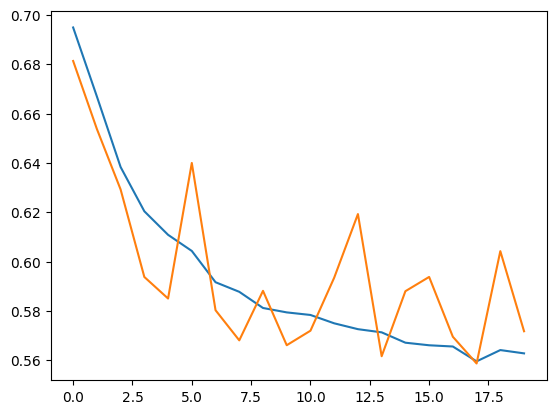

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

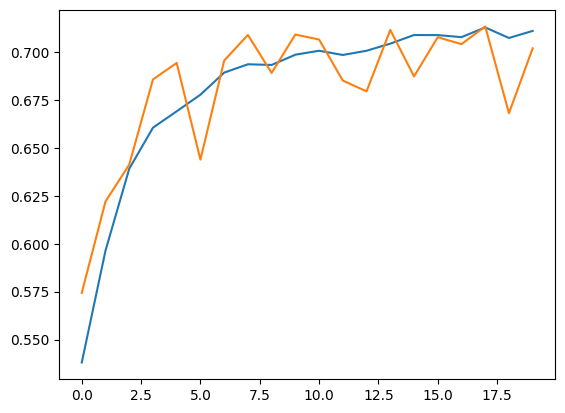

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [28]:
loss,accuracy = model.evaluate(X_val_onehot, y_val, verbose=0)

In [29]:
print(accuracy)

0.7017999887466431


# Embedding Layer로 신경망 모델 성능 높이기

- Embedding을 함으로써 비교했을때 숫자들의 차이가 크면 거리가 멀다고 한다
- OneHot Encoding 방식은 '단어 사이에는 관련이 전혀 없다'는 전제가 있어야한다.
- 하지만 Embedding 방식으로 관계를 고려할 수 있다.

In [3]:
from tensorflow.keras.layers import Embedding

import numpy as np
from tensorflow.keras.datasets import imdb

In [5]:
(X_train_all, y_train_all), (X_test, y_test) = imdb.load_data(skip_top=20, num_words=1000)

for i in range(len(X_train_all)):
    X_train_all[i] = [w for w in X_train_all[i] if w>2]

np.random.seed(42)
random_index = np.random.permutation(25000)

X_train = X_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]

X_val = X_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

In [6]:
from tensorflow.keras.preprocessing import sequence

In [7]:
maxlen=100
X_train_seq = sequence.pad_sequences(X_train, maxlen= maxlen)
X_val_seq = sequence.pad_sequences(X_val, maxlen= maxlen)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [10]:
model_ebd = Sequential()

model_ebd.add(Embedding(1000,32))
model_ebd.add(SimpleRNN(8))
model_ebd.add(Dense(1,activation='sigmoid'))

model_ebd.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          32000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 8)                 328       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 32,337
Trainable params: 32,337
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_ebd.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_ebd.fit(X_train_seq, y_train, epochs=10, batch_size=32, validation_data=(X_val_seq, y_val))

Epoch 1/10
625/625 [==============================] - 16s 23ms/step - loss: 0.6271 - accuracy: 0.6376 - val_loss: 0.5168 - val_accuracy: 0.7578
Epoch 2/10
625/625 [==============================] - 14s 22ms/step - loss: 0.4574 - accuracy: 0.7964 - val_loss: 0.4509 - val_accuracy: 0.8030
Epoch 3/10
625/625 [==============================] - 15s 23ms/step - loss: 0.3967 - accuracy: 0.8324 - val_loss: 0.4259 - val_accuracy: 0.8058
Epoch 4/10
625/625 [==============================] - 16s 25ms/step - loss: 0.3607 - accuracy: 0.8517 - val_loss: 0.4181 - val_accuracy: 0.8150
Epoch 5/10
625/625 [==============================] - 15s 24ms/step - loss: 0.3384 - accuracy: 0.8631 - val_loss: 0.4198 - val_accuracy: 0.8126
Epoch 6/10
625/625 [==============================] - 16s 25ms/step - loss: 0.3149 - accuracy: 0.8738 - val_loss: 0.4326 - val_accuracy: 0.8066
Epoch 7/10
625/625 [==============================] - 16s 26ms/step - loss: 0.3026 - accuracy: 0.8786 - val_loss: 0.4331 - val_accuracy:

In [13]:
import matplotlib.pyplot as plt

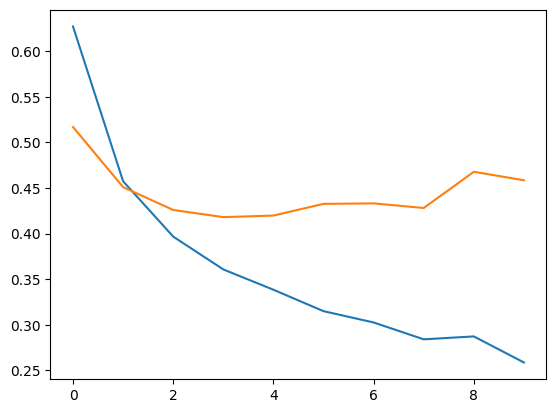

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

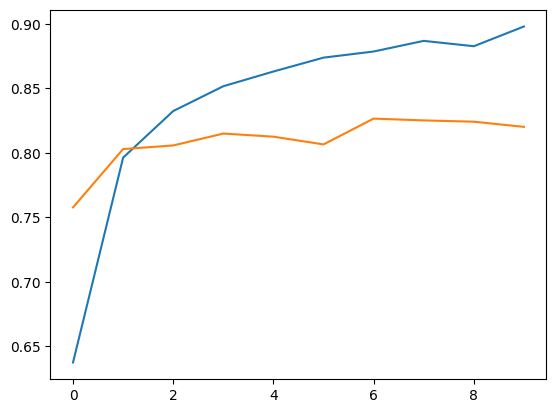

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [18]:
loss, accuracy = model_ebd.evaluate(X_val_seq, y_val, verbose=0)
print(accuracy)

0.8202000260353088


# LSTM

In [19]:
from tensorflow.keras.layers import LSTM

In [20]:
model_lstm = Sequential()

model_lstm.add(Embedding(1000,32))
model_lstm.add(LSTM(8))
model_lstm.add(Dense(1,activation='sigmoid'))
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          32000     
                                                                 
 lstm (LSTM)                 (None, 8)                 1312      
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 33,321
Trainable params: 33,321
Non-trainable params: 0
_________________________________________________________________


In [21]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_lstm.fit(X_train_seq, y_train, epochs=10, batch_size=32, validation_data=(X_val_seq,y_val))

Epoch 1/10
625/625 [==============================] - 26s 37ms/step - loss: 0.4509 - accuracy: 0.7970 - val_loss: 0.3685 - val_accuracy: 0.8428
Epoch 2/10
625/625 [==============================] - 21s 33ms/step - loss: 0.3380 - accuracy: 0.8581 - val_loss: 0.3614 - val_accuracy: 0.8406
Epoch 3/10
625/625 [==============================] - 21s 34ms/step - loss: 0.3158 - accuracy: 0.8674 - val_loss: 0.3601 - val_accuracy: 0.8372
Epoch 4/10
625/625 [==============================] - 22s 35ms/step - loss: 0.3016 - accuracy: 0.8731 - val_loss: 0.3685 - val_accuracy: 0.8396
Epoch 5/10
625/625 [==============================] - 20s 32ms/step - loss: 0.2873 - accuracy: 0.8808 - val_loss: 0.3668 - val_accuracy: 0.8400
Epoch 6/10
625/625 [==============================] - 21s 33ms/step - loss: 0.2782 - accuracy: 0.8844 - val_loss: 0.3693 - val_accuracy: 0.8392
Epoch 7/10
625/625 [==============================] - 21s 33ms/step - loss: 0.2639 - accuracy: 0.8884 - val_loss: 0.3715 - val_accuracy:

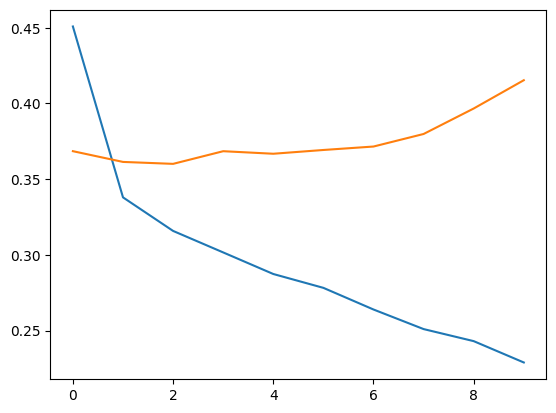

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

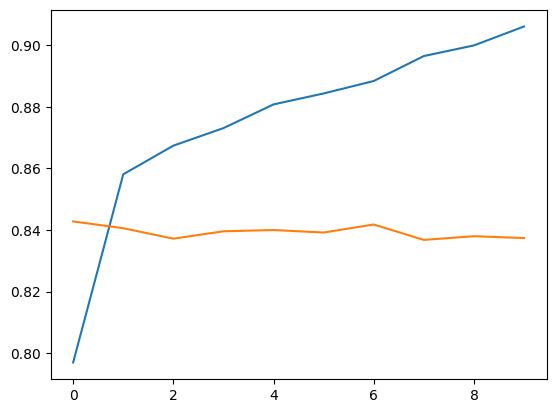

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [25]:
loss, accuracy = model_lstm.evaluate(X_val_seq, y_val, verbose=0)
print(accuracy)

0.8374000191688538
